## Gridrec

Here is an example on how to use [TomoPy](http://tomopy.readthedocs.io/en/latest/) with the gridrec algorithm.

In [69]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


[Install](http://tomopy.readthedocs.io/en/latest/install.html) TomoPy then:

In [70]:
import tomopy

[DXchange](http://dxchange.readthedocs.io) is installed with tomopy to provide support 
for tomographic data loading. Various data format from all major [synchrotron](http://dxchange.readthedocs.io/en/latest/source/demo.html) facilities are supported. 

In [71]:
import dxchange

matplotlib provide plotting of the result in this notebook. [Paraview](http://www.paraview.org/) or other tools are available for more sophisticated 3D rendering.

In [72]:
import matplotlib.pyplot as plt

In [73]:
fname = '../../../tomopy/data/tooth.h5'

Select the sinogram range to reconstruct.

In [74]:
start = 0
end = 2

This data set file format follows the [APS](http://www.aps.anl.gov) beamline [2-BM and 32-ID](https://www1.aps.anl.gov/Imaging) definition. Other file format readers are available at [DXchange](http://dxchange.readthedocs.io/en/latest/source/api/dxchange.exchange.html).

In [75]:
proj, flat, dark = dxchange.read_aps_32id(fname, sino=(start, end))

Plot the sinogram:

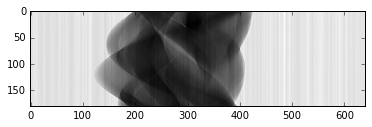

In [76]:
plt.imshow(proj[:, 0, :], cmap='Greys_r')
plt.show()

If the angular information is not avaialable from the raw data you need to set the data collection angles. In this case theta is set as equally spaced between 0-180 degrees.

In [77]:
theta = tomopy.angles(proj.shape[0])

Perform the flat-field correction of raw data: $$ \frac{proj - dark} {flat - dark} $$

In [78]:
proj = tomopy.normalize(proj, flat, dark)

Tomopy provides various methods to [find rotation center](http://tomopy.readthedocs.io/en/latest/api/tomopy.recon.rotation.html).

In [79]:
rot_center = tomopy.find_center(proj, theta, init=290, ind=0, tol=0.5)

Calculate $$ -log(proj) $$

In [80]:
tomopy.minus_log(proj)

Reconstruction using Gridrec algorithm.Tomopy provides various [reconstruction](http://tomopy.readthedocs.io/en/latest/api/tomopy.recon.algorithm.html) methods including the one part of the [ASTRA toolbox](https://sourceforge.net/p/astra-toolbox/wiki/Home/).

In [81]:
recon = tomopy.recon(proj, theta, center=rot_center, algorithm='gridrec')

Mask each reconstructed slice with a circle.

In [82]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)

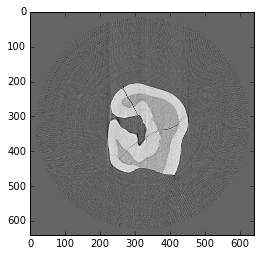

In [84]:
plt.imshow(recon[0, :,:], cmap='Greys_r')
plt.show()